# Credit Card Fraud Detection Analysis   
  
##### By : Amit Kumbhar

## Steps involved in the analysis

Step 1 : Reading and Understanding Data  
  
Step 2 : Exploratory Data Analysis  
>Step 2.1 : Univariate Analysis  
>Step 2.2 : Bivariate Analysis  
>Step 2.3 : Multivariate Analysis  
  
Step 3 : Data Preparation and Train/Test Data Splitting  
> Step 3.1 : Data Preparation  
> Step 3.2 : Performing Train/Test Split
  
Step 4 : Model Building and Hyperparameter Tuning
> Step 4.1 : Perparing Test Data for Evaluation 
  
Step 5 : Model Evaluation 
  
Step 6 : Cost-Benifit Analysis
>Step 6.1 : Cost-Benifit Analysis : Part 1  
>Step 6.2 : Cost-Benifit Analysis : Part 2  
>> Step 6.2.1 : Cost incurred before model deployment  
>> Step 6.2.2 : Cost incurred after model deployment 

In [1]:
# linking notebook to the database

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Importing Required Libraries

In [2]:
# supressing warnings
import warnings
warnings.filterwarnings('ignore')

# for dataframe manipulation 
import pandas as pd
pd.options.display.float_format='{:,.4f}'.format

# for numeric computation 
import numpy as np

# for data visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# for logistic regression 
import sklearn 
from sklearn import linear_model 

# for decision trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# for random forests
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

# for XGBoost
from xgboost import XGBClassifier

# for scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for splitiing data 
from sklearn.model_selection import StratifiedKFold

# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# for balancing data
import imblearn
from imblearn.over_sampling import SMOTE

# for pipelining
from sklearn import pipeline
from sklearn.pipeline import Pipeline

# for model evaluation 
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix, roc_curve, auc

## Step 1 : Reading and Understanding data

In [3]:
# reading data

data = pd.read_csv('/content/gdrive/MyDrive/Fraud Analytics Datasets/fraudTrain.csv')

# inspecting data

data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0


In [4]:
# inspecing data shape

data.shape

(1296675, 23)

In [5]:
# inspecting column info 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# inspecting numerical columns 

data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,"1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000"
mean,"648,337.0000","417,192,042,079,641,088.0000",70.3510,"48,800.6711",38.5376,-90.2263,"88,824.4406","1,349,243,636.7261",38.5373,-90.2265,0.0058
std,"374,317.9745","1,308,806,447,000,789,248.0000",160.3160,"26,893.2225",5.0758,13.7591,"301,956.3607","12,841,278.4234",5.1098,13.7711,0.0759
min,0.0000,"60,416,207,185.0000",1.0000,"1,257.0000",20.0271,-165.6723,23.0000,"1,325,376,018.0000",19.0278,-166.6712,0.0000
25%,"324,168.5000","180,042,946,491,150.0000",9.6500,"26,237.0000",34.6205,-96.7980,743.0000,"1,338,750,742.5000",34.7336,-96.8973,0.0000
50%,"648,337.0000","3,521,417,320,836,166.0000",47.5200,"48,174.0000",39.3543,-87.4769,"2,456.0000","1,349,249,747.0000",39.3657,-87.4384,0.0000
75%,"972,505.5000","4,642,255,475,285,942.0000",83.1400,"72,042.0000",41.9404,-80.1580,"20,328.0000","1,359,385,375.5000",41.9572,-80.2368,0.0000
max,"1,296,674.0000","4,992,346,398,065,154,048.0000","28,948.9000","99,783.0000",66.6933,-67.9503,"2,906,700.0000","1,371,816,817.0000",67.5103,-66.9509,1.0000


In [7]:
# inspecting categorical columns

data.describe(include='object')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2020-06-02 12:47:07,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,294d42a9f813549b65bf43f307954dd1
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [8]:
# converting trans_date_trans_time to appropriate format

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

## Step 2 : Exploratory Data Analysis

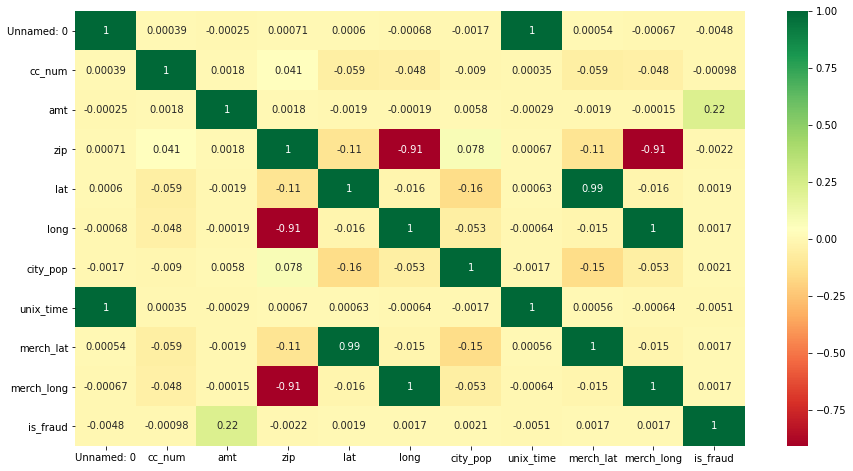

In [ ]:
# inspecting correlation between variables

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

### Step 2.1 : Univariate Analysis

Univariate Analysis : Categorical 

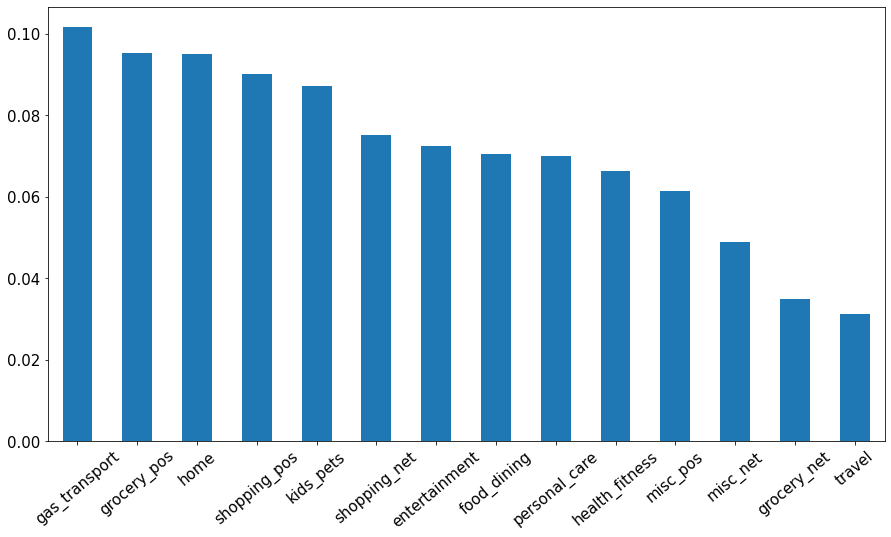

In [ ]:
# analyzing 'Category' column

plt.figure(figsize=(15,8))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
data.category.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=40)
plt.show()

From the above distribution of ```categories``` we observe that the data is   distributed fairly and find no significant skewness. 
  
We also see that a majority of customers use credit cards to make payments for ```gas_transportation```, ```grocery_pos```, ```home``` and ```shopping_pos```.
 

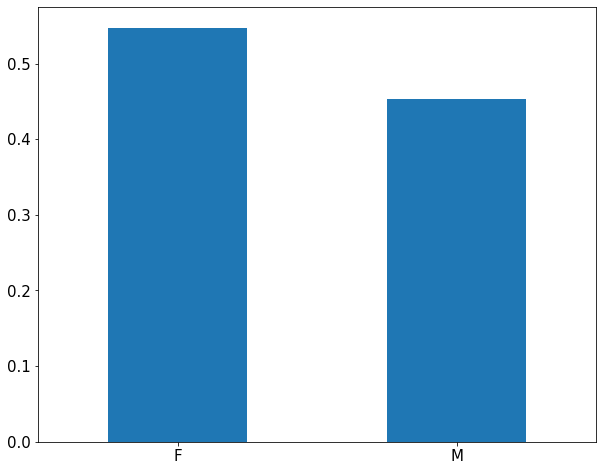

In [ ]:
# analyzing 'gender' column 

plt.figure(figsize=(10,8))
data.gender.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

From the above distirbution of ```gender``` we find no significant skewness and   
observe that credit card transactions made by ```Women``` are more than that of ```Men```.

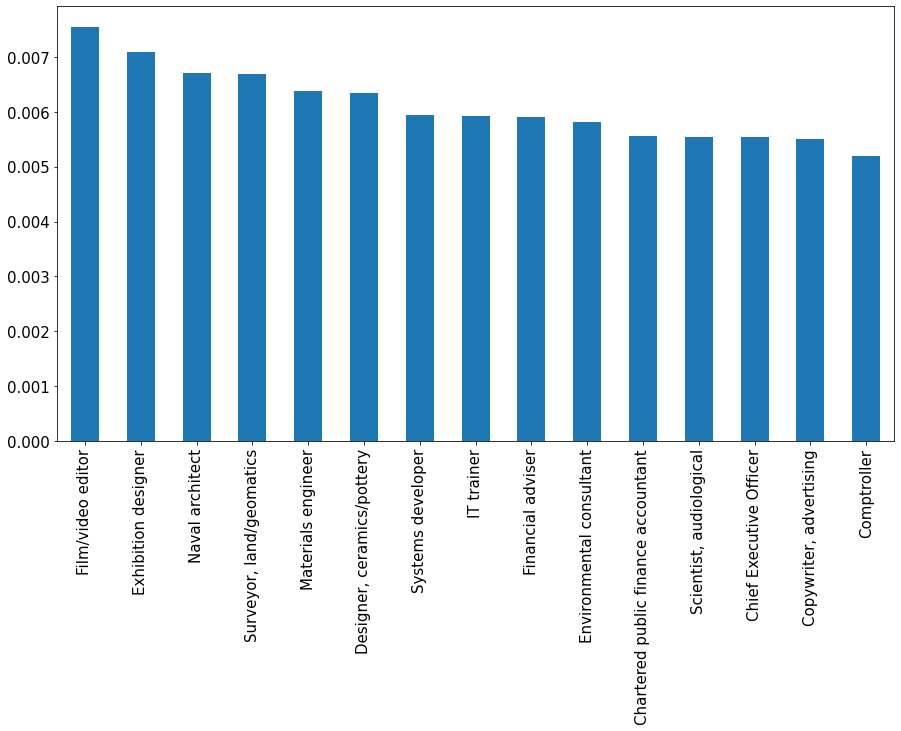

In [ ]:
# analyzing 'job' column

plt.figure(figsize=(15,8))
pd.options.display.float_format='{:,.4f}'.format
data.job.value_counts(normalize=True).head(15).plot(kind='bar')
plt.show()

On analyzing 494 different ```jobs```, ```Film/Video Editors```, ```Exhibition Designers``` and  ```Naval Architects``` contribute the most to the distribution.  

**No significant skewness** is observed.

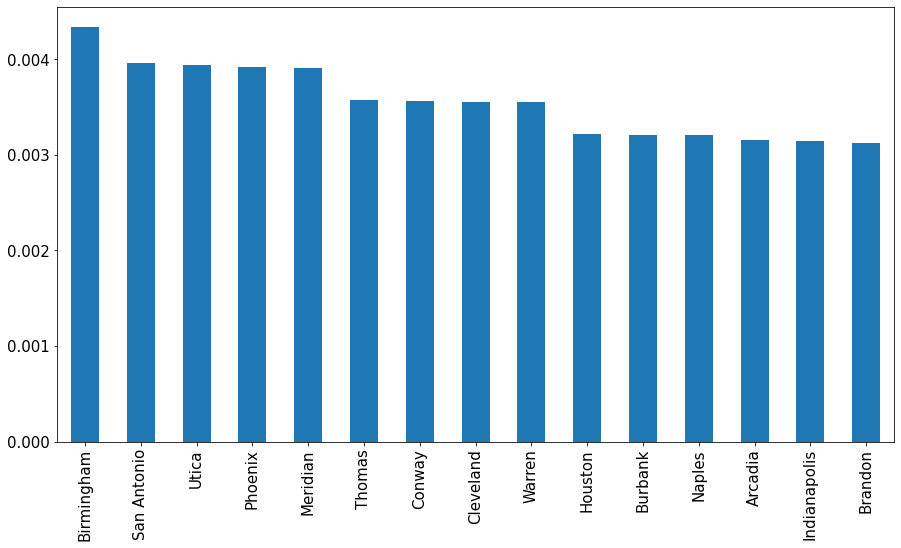

In [ ]:
# analyzing 'city' column

plt.figure(figsize=(15,8))
data.city.value_counts(normalize=True).head(15).plot(kind='bar')
plt.show()

On analyzing 894 different ```cities``` for transaction counts, ```Birmingham```, ```San Antonio```, and ```Utica``` contribute the most to the distribution.  

We do not observe any significant skewness.

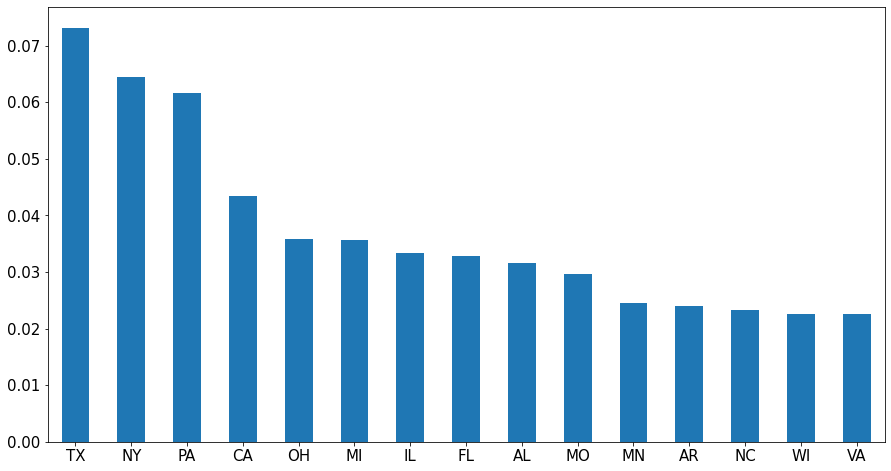

In [ ]:
# analyzing 'state' column

plt.figure(figsize=(15,8))
data.state.value_counts(normalize=True).head(15).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Univariate Analysis : Numerical

In [ ]:
# analyzing data distribution for 'amt' column

data.amt.describe(percentiles=[0.25,0.40,0.50,0.60,0.70,0.75,0.80,0.90,0.95,0.99])

count   1,296,675.0000
mean           70.3510
std           160.3160
min             1.0000
25%             9.6500
40%            32.1300
50%            47.5200
60%            60.9400
70%            75.0300
75%            83.1400
80%            94.6800
90%           136.6700
95%           196.3100
99%           545.9926
max        28,948.9000
Name: amt, dtype: float64

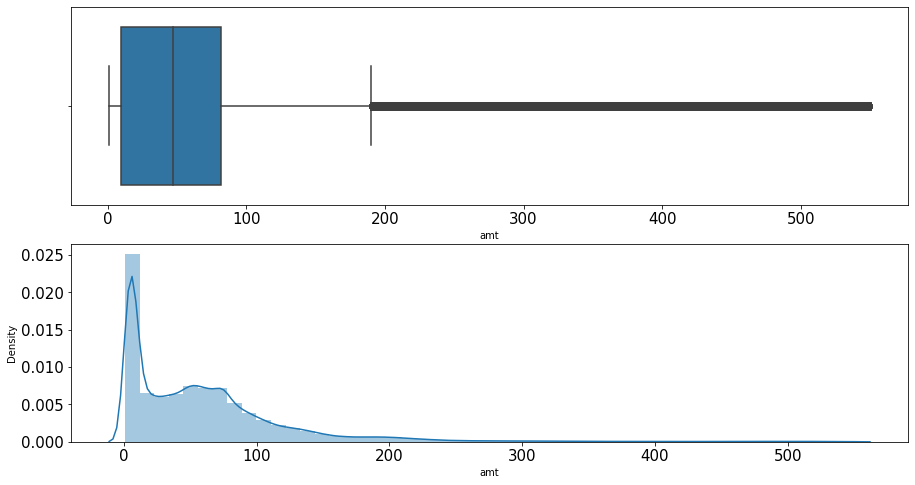

In [ ]:
# analysing 'amt' column

plt.figure(figsize=(15,8))

plt.subplot(211)
sns.boxplot(data.amt[data.amt<550])

plt.subplot(212)
sns.distplot(data.amt[data.amt<550])

plt.show()

On analysing ```amt``` column we see that usual credit card transactions are in the range of \$9.00 to \$546.00.  
And in that range probability of transcation being in the range of approx. \$9.00 to \$30.00 is higher than of it being in \$30.00 to \$200.00

In [ ]:
# analyzing the distribution of 'city_pop' column

data.city_pop.describe(percentiles=[0.25,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.90,0.95,0.99])

count   1,296,675.0000
mean       88,824.4406
std       301,956.3607
min            23.0000
25%           743.0000
30%           964.0000
40%         1,631.0000
50%         2,456.0000
60%         4,680.0000
70%        10,076.0000
75%        20,328.0000
80%        42,384.0000
90%       186,140.0000
95%       525,713.0000
99%     1,577,385.0000
max     2,906,700.0000
Name: city_pop, dtype: float64

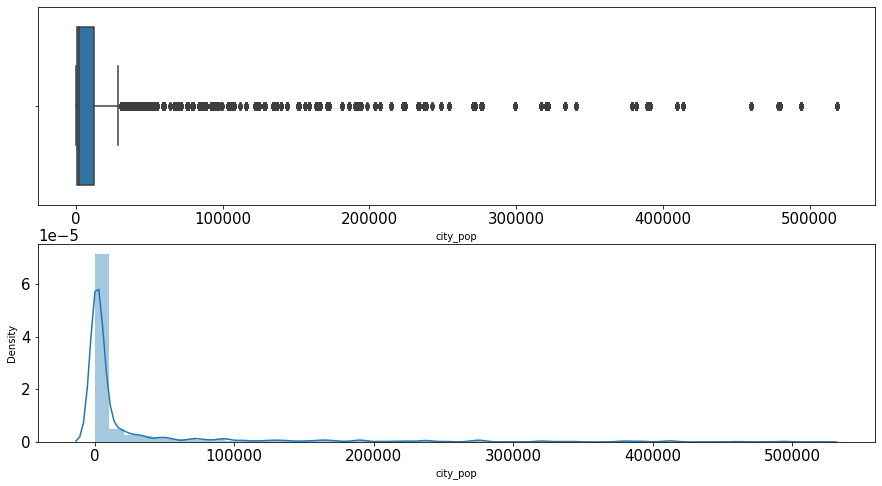

In [ ]:
# analyzing 'city_pop' column

plt.figure(figsize=(15,8))

plt.subplot(211)
sns.boxplot(data.city_pop[data.city_pop<525713])

plt.subplot(212)
sns.distplot(data.city_pop[data.city_pop<525713])

plt.show()

### Step 2.2 : Bivariate Analysis

In [9]:
# separating fraudulent and non-fradulent transactions

f = data[data.is_fraud==1]  # fradulent transactions dataset

nf = data[data.is_fraud==0]   # non-fradulent transactions dataset

In [10]:
# inspecting shape of dataframes

print('Fradulent Transactions : ',f.shape)
print('Non-Fradulent Transactions : ',nf.shape)

Fradulent Transactions :  (7506, 23)
Non-Fradulent Transactions :  (1289169, 23)


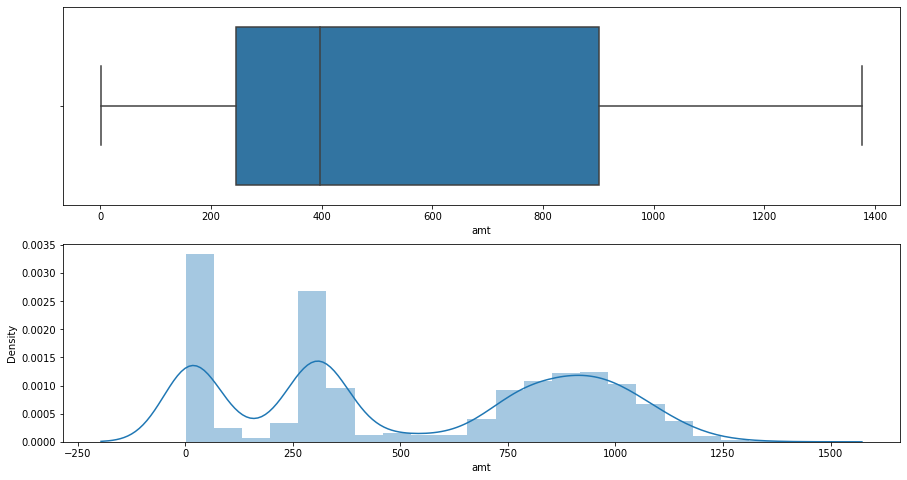

In [11]:
# analysing 'amt' column

plt.figure(figsize=(15,8))

plt.subplot(211)
sns.boxplot(f.amt)

plt.subplot(212)
sns.distplot(f.amt)

plt.show()

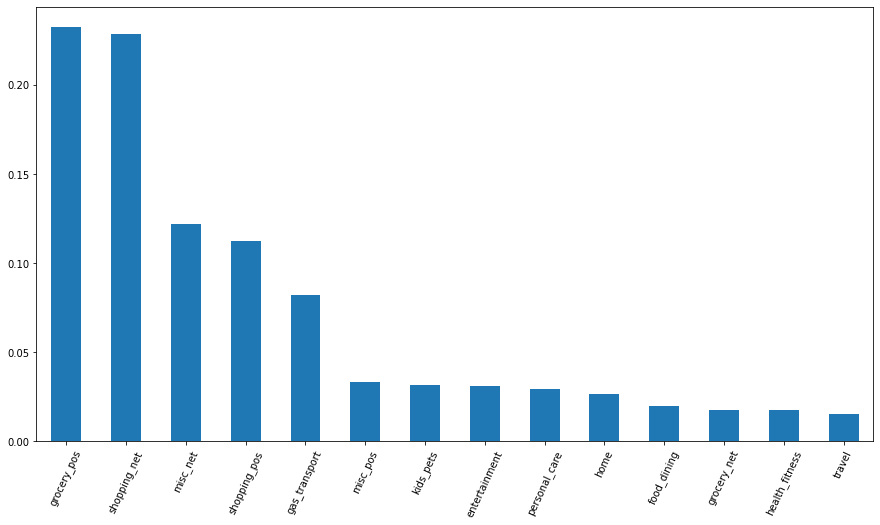

In [12]:
# analyzing category w.r.t is_fraud

plt.figure(figsize=(15,8))
f.category.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=65)
plt.show()

In [13]:
# analysing fradulent transactions w.r.t date and time 

fraud_time = f[['trans_date_trans_time','is_fraud']]

# creating date column
fraud_time['date'] = fraud_time['trans_date_trans_time'].dt.date

# creating date column
fraud_time['time'] = fraud_time['trans_date_trans_time'].dt.time

# dropping trans_date_trans_time
fraud_time.drop('trans_date_trans_time',axis=1,inplace=True)

# creating month column 
fraud_time['month'] = pd.DatetimeIndex(fraud_time['date']).month

# creating year column
fraud_time['year'] = pd.DatetimeIndex(fraud_time['date']).year

# creating day column 
fraud_time['day'] = pd.DatetimeIndex(fraud_time['date']).day

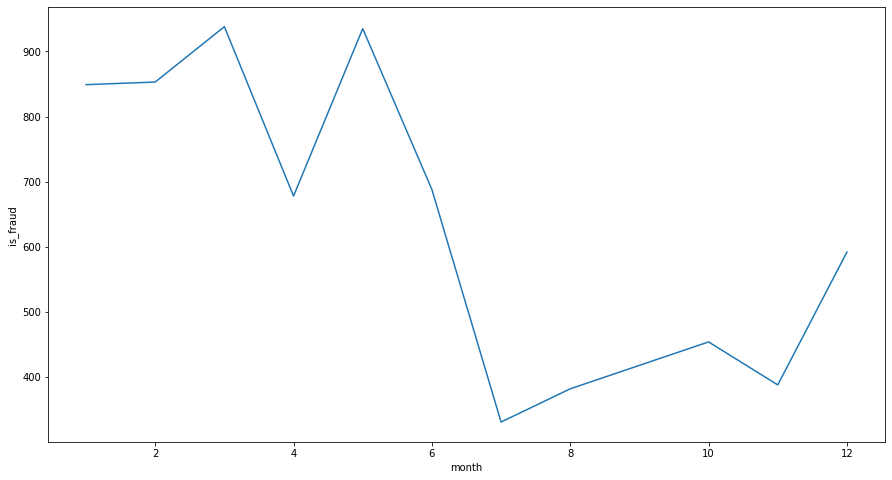

In [14]:
# inspecting month w.r.t is_fraud
fraud_month = pd.DataFrame(pd.pivot_table(fraud_time,index=['month'],values=['is_fraud'],aggfunc='count'))

# plotting month v/s is_fraud
plt.figure(figsize=(15,8))
sns.lineplot(x=fraud_month.index,y=fraud_month.is_fraud)
plt.show()

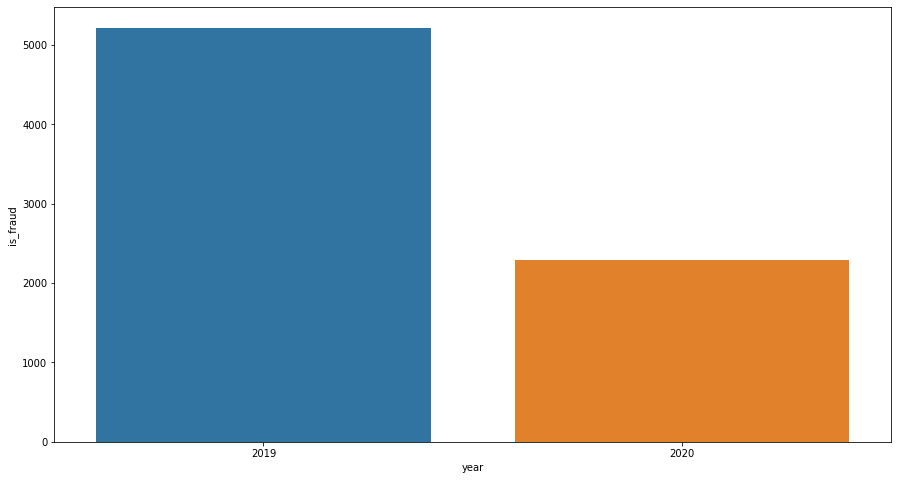

In [15]:
# inspecting year w.r.t is_fraud
fraud_year = pd.DataFrame(pd.pivot_table(fraud_time,index=['year'],values=['is_fraud'],aggfunc='count'))

# plotting year v/s is_fraud
plt.figure(figsize=(15,8))
sns.barplot(x=fraud_year.index,y=fraud_year.is_fraud)
plt.show()

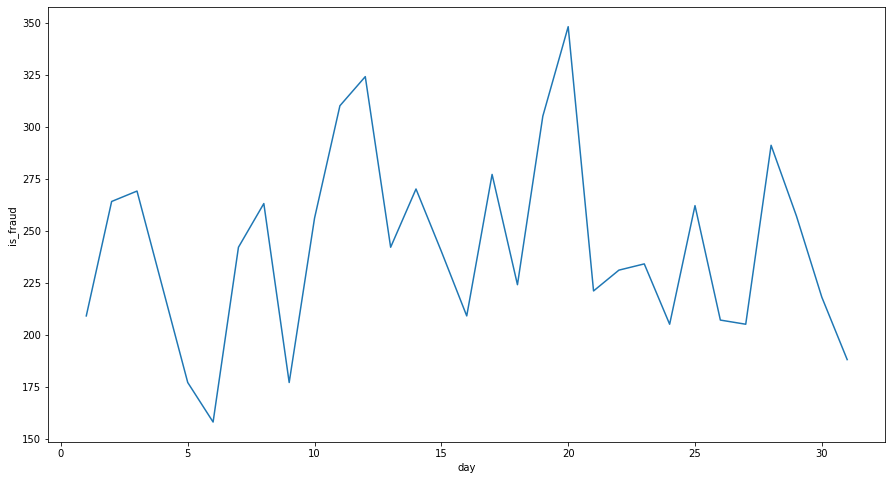

In [16]:
# inspecting day w.r.t is_fraud
fraud_day = pd.DataFrame(pd.pivot_table(fraud_time,index=['day'],values=['is_fraud'],aggfunc='count'))

# plotting day v/s is_fraud
plt.figure(figsize=(15,8))
sns.lineplot(x=fraud_day.index,y=fraud_day.is_fraud)
plt.show()

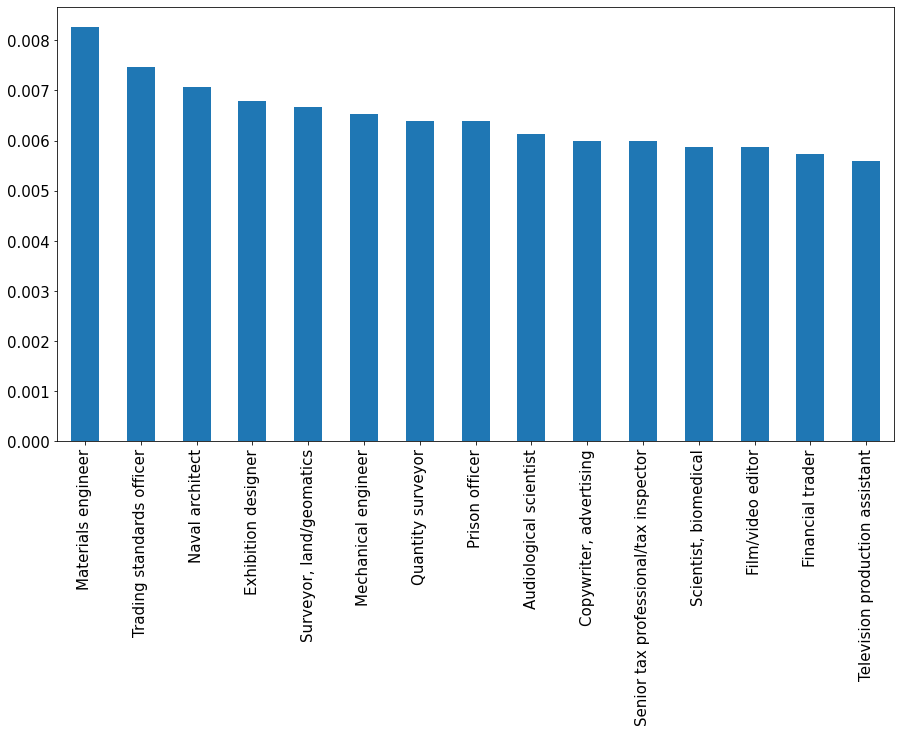

In [ ]:
# analyzing jobs w.r.t is_fraud

plt.figure(figsize=(15,8))
f.job.value_counts(normalize=True).head(15).plot(kind='bar')
plt.show()

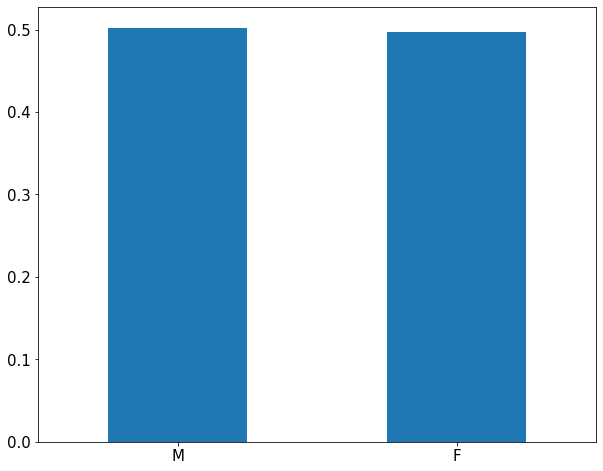

In [ ]:
# analyzing gender w.r.t is_fraud

plt.figure(figsize=(10,8))
f.gender.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

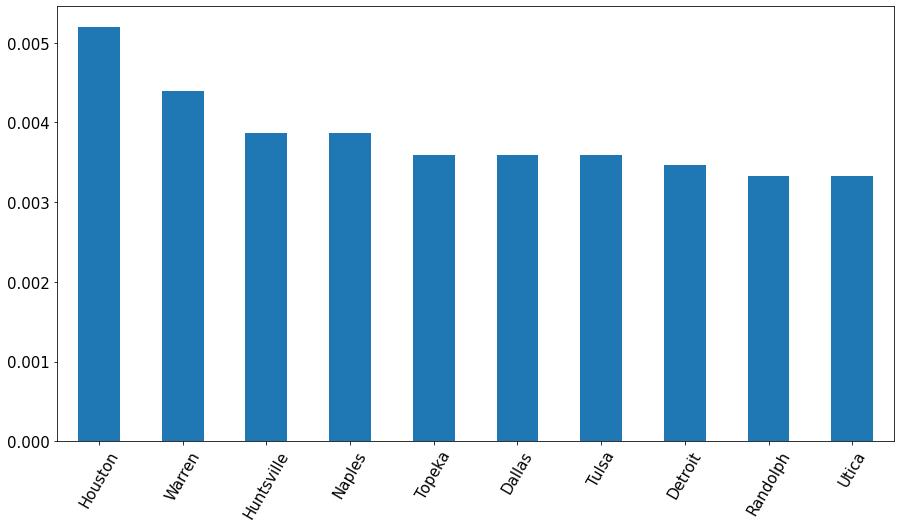

In [ ]:
# analyzing city w.r.t is_fraud

plt.figure(figsize=(15,8))
f.city.value_counts(normalize=True).head(10).plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

### Step 2.3 : Multivariate Analysis

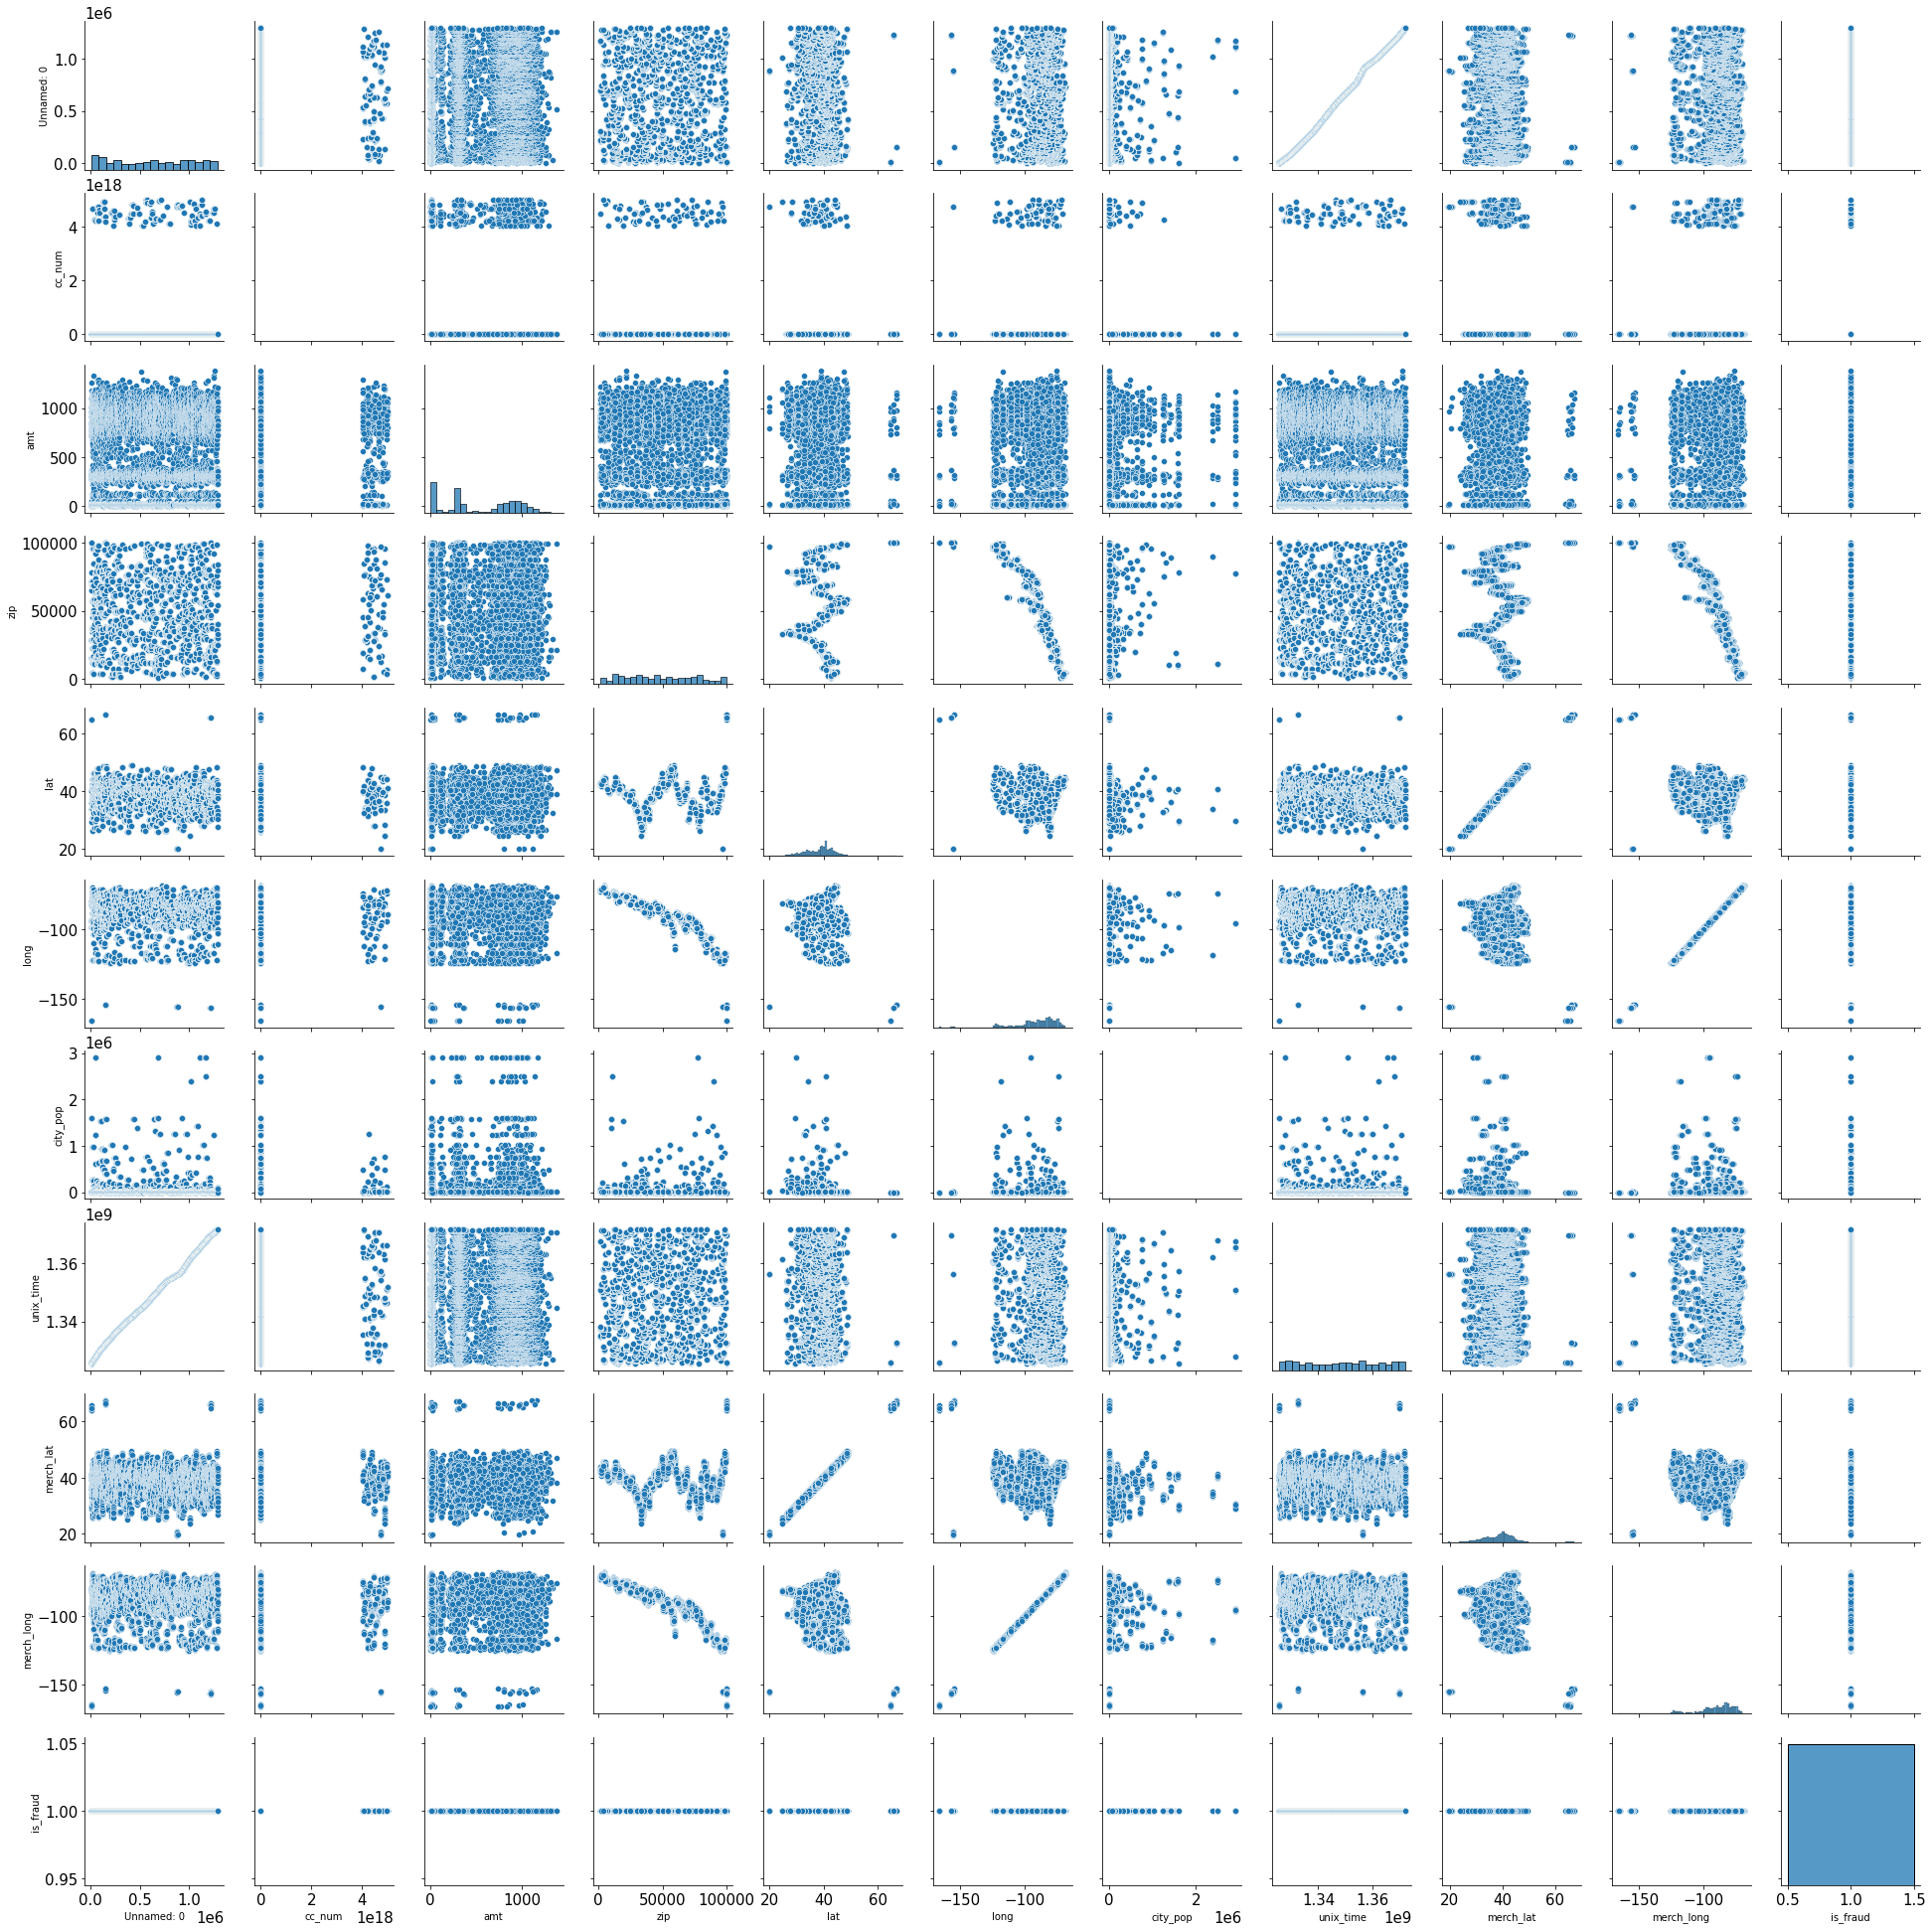

In [ ]:
# plotting a pairplot for fraudulent transactions

sns.pairplot(f)
plt.show()

## Step 3 : Data Preparation and Train/Test Data Splitting

### Step 3.1 : Data Preparation 

In [17]:
# converting binary categorical variable to numeric 

data.gender.replace({'M':1,'F':0},inplace=True)

# inspecting updated column

data.gender.unique()

array([0, 1])

In [18]:
# capping value for outlier : Analysis

print('Fradulent Transactions')
print('- -'*10)
print(f.amt.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.97,0.99,1]))
print('*'*30)
print('Non-Fradulent Transactions')
print('- -'*10)
print(nf.amt.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.97,0.99,1]))

Fradulent Transactions
- -- -- -- -- -- -- -- -- -- -
count   7,506.0000
mean      531.3201
std       390.5601
min         1.0600
25%       245.6625
50%       396.5050
75%       900.8750
80%       939.5200
90%     1,024.5950
95%     1,083.9850
97%     1,123.7565
99%     1,179.6900
100%    1,376.0400
max     1,376.0400
Name: amt, dtype: float64
******************************
Non-Fradulent Transactions
- -- -- -- -- -- -- -- -- -- -
count   1,289,169.0000
mean           67.6671
std           154.0080
min             1.0000
25%             9.6100
50%            47.2800
75%            82.5400
80%            93.7900
90%           134.2100
95%           189.9000
97%           229.7700
99%           486.3032
100%       28,948.9000
max        28,948.9000
Name: amt, dtype: float64


From the above distribution of ```amount values``` for ```fradulent``` and ```non-fradulent``` transactions we can fix the ```capping value``` for amounts as /$1400 . 

In [19]:
# capping amounts

data.amt.clip(1,1400,inplace=True)

# inspecting updated column 

data.amt.describe()

count   1,296,675.0000
mean           68.7415
std           109.6769
min             1.0000
25%             9.6500
50%            47.5200
75%            83.1400
max         1,400.0000
Name: amt, dtype: float64

In [20]:
# extracting categorical columns 

data_cat = data[['merchant','category','gender','state','job','is_fraud']]

In [21]:
# Weight of Evidence(WOE) and Information Value(IV) test 

def cal_woe_iv(data_cat,feature, target):
  lst = []
  for i in range (data_cat[feature].nunique()):
    val = list(data_cat[feature].unique())[i]
    lst.append({
        'Value': val,
        'All': data_cat[data_cat[feature] == val].count()[feature],
        'Good': data_cat[(data_cat[feature] == val) & (data_cat[target] == 0)].count()[feature],
        'Bad': data_cat[(data_cat[feature] == val) & (data_cat[target] == 1)].count()[feature]
    })

  dset = pd.DataFrame(lst)
  dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
  dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
  dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
  dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
  dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
  iv = dset['IV'].sum()
    
  dset = dset.sort_values(by='WoE')
    
  return dset, iv

In [ ]:
# performing WOE and IV test  

for col in data_cat.columns:
    if col == 'is_fraud': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = cal_woe_iv(data_cat, col, 'is_fraud')
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: merchant
                                   Value   All  Good  ...  Distr_Bad     WoE     IV
309                    fraud_Kozey-Boehm  1866  1818  ...     0.0064 -1.5118 0.0075
104    fraud_Herman, Treutel and Dickens  1300  1267  ...     0.0044 -1.4982 0.0051
11                 fraud_Kerluke-Abshire  1838  1797  ...     0.0055 -1.3657 0.0056
294                      fraud_Brown PLC  1176  1150  ...     0.0035 -1.3566 0.0035
335                    fraud_Goyette Inc  1943  1901  ...     0.0056 -1.3336 0.0055
..                                   ...   ...   ...  ...        ...     ...    ...
550                    fraud_Berge-Hills  2284  2283  ...     0.0001  2.5872 0.0042
518                 fraud_Schmidt-Larkin  2381  2380  ...     0.0001  2.6288 0.0045
380  fraud_Prosacco, Kreiger and Kovacek  2440  2439  ...     0.0001  2.6533 0.0047
384                 fraud_Beier and Sons  2473  2472  ...     0.0001  2.6667 0.0048
381               fraud_Eichmann-Kilback  25

On performing the `Weight of Evidence` and `Information Value` Test we obtain following results.

`merchant` (0.84)   
`category` (0.76)   
`gender` (0.01)   
`state` (0.04)   
`job` (0.32)


Using the following table to identify the predictivity of the variables

INFORMATION VALUE /  PREDICTIVE POWER
  
><0.02 / Useless for Prediction   
>0.02-0.1 /  Weak Predictor   
>0.1 - 0.3 / Medium Predictor   
>0.3 - 0.5 / Strong Predictor  
>0.5 / Suspecious or Too good to be true


On analysing the IV scores for the variables we choose `state` and `job` from the categorical variables for the analysis.

In [ ]:
# extracting essential columns for analysis

df = data[['gender','state','job','amt','is_fraud']]

# inspecting dataframe

df.head()

,gender,state,job,amt,is_fraud
0,0,NC,"Psychologist, counselling",4.9700,0
1,0,WA,Special educational needs teacher,107.2300,0
2,1,ID,Nature conservation officer,220.1100,0
3,1,MT,Patent attorney,45.0000,0
4,1,VA,Dance movement psychotherapist,41.9600,0


In [ ]:
# additive smoothing encoding scheme

def calc_smooth_mean(df, by, on, m):
  
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [ ]:
# encoding columns

df['gender'] = calc_smooth_mean(df,by='gender',on='is_fraud',m=500)
df['state'] = calc_smooth_mean(df,by='state',on='is_fraud',m=500)
df['job'] = calc_smooth_mean(df,by='job',on='is_fraud',m=500)

In [ ]:
# inspecting updated dataframe

df.describe()

,gender,state,job,amt,is_fraud
count,"1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000"
mean,0.0058,0.0058,0.0055,68.7415,0.0058
std,0.0006,0.0011,0.0029,109.6769,0.0759
min,0.0053,0.0023,0.0004,1.0000,0.0000
25%,0.0053,0.0052,0.0034,9.6500,0.0000
50%,0.0053,0.0057,0.0052,47.5200,0.0000
75%,0.0064,0.0066,0.0072,83.1400,0.0000
max,0.0064,0.0234,0.0422,"1,400.0000",1.0000


### Step 3.2 : Performing Train/Test Split

In [ ]:
# splitting independent and dependent variables

y = df.pop('is_fraud')
X = df

In [ ]:
# scaling amt variable 

scaler = MinMaxScaler()

X[['amt']] = scaler.fit_transform(X[['amt']])

X.amt.describe()

count   1,296,675.0000
mean            0.0484
std             0.0784
min             0.0000
25%             0.0062
50%             0.0333
75%             0.0587
max             1.0000
Name: amt, dtype: float64

In [ ]:
# inspecting values

df.describe()

,gender,state,job,amt
count,"1,296,675.0000","1,296,675.0000","1,296,675.0000","1,296,675.0000"
mean,0.0058,0.0058,0.0055,0.0484
std,0.0006,0.0011,0.0029,0.0784
min,0.0053,0.0023,0.0004,0.0000
25%,0.0053,0.0052,0.0034,0.0062
50%,0.0053,0.0057,0.0052,0.0333
75%,0.0064,0.0066,0.0072,0.0587
max,0.0064,0.0234,0.0422,1.0000


In [ ]:
# handling minority class problem: balancing data

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X,y) 

In [ ]:
# converting balanced data to dataframe

X_sm = pd.DataFrame(X_sm,columns=X.columns)
y_sm = pd.DataFrame(y_sm)

print('X_sm : ',X_sm.head())
print('*'*20)
print('y_sm : ',y_sm.head())

X_sm :     gender  state    job    amt
0  0.0053 0.0049 0.0022 0.0028
1  0.0053 0.0051 0.0025 0.0759
2  0.0064 0.0023 0.0108 0.1566
3  0.0064 0.0028 0.0076 0.0315
4  0.0064 0.0068 0.0011 0.0293
********************
y_sm :     0
0  0
1  0
2  0
3  0
4  0


In [ ]:
# performing stratified k fold splitting

num_cv_splits = 5
skf = StratifiedKFold(n_splits=num_cv_splits, shuffle=True, random_state=0)

## Step 4 : Model Building and Hyperparameter Tuning

In [ ]:
# modeling using Linear Regression 

num_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

auc = np.zeros((len(num_C), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_sm, y_sm):
    X_train_cv, X_test_cv = X_sm.iloc[train_index], X_sm.iloc[test_index]
    y_train_cv, y_test_cv = y_sm.iloc[train_index], y_sm.iloc[test_index]
    for C_id, C_val in enumerate(num_C):
        clf = linear_model.LogisticRegression(C=C_val, random_state=0, solver='lbfgs', max_iter=1000, n_jobs=-1)
        clf.fit(X_train_cv, y_train_cv)
        auc[C_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('C_val =', C_val, '; auc =', auc[C_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)

print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])

C_val = 0.001 ; auc = 0.8341789330126111 ; cv_num = 0
C_val = 0.01 ; auc = 0.836482454795948 ; cv_num = 0
C_val = 0.1 ; auc = 0.8494853974488352 ; cv_num = 0
C_val = 1.0 ; auc = 0.8750568439239944 ; cv_num = 0
C_val = 10.0 ; auc = 0.8815278440241942 ; cv_num = 0
C_val = 100.0 ; auc = 0.8824383149575715 ; cv_num = 0
C_val = 1000.0 ; auc = 0.882554924206844 ; cv_num = 0
C_val = 0.001 ; auc = 0.8349310027509302 ; cv_num = 1
C_val = 0.01 ; auc = 0.8372502693844415 ; cv_num = 1
C_val = 0.1 ; auc = 0.8503297899209449 ; cv_num = 1
C_val = 1.0 ; auc = 0.8758360467727941 ; cv_num = 1
C_val = 10.0 ; auc = 0.8822051433088506 ; cv_num = 1
C_val = 100.0 ; auc = 0.8831362183720816 ; cv_num = 1
C_val = 1000.0 ; auc = 0.8832361945574851 ; cv_num = 1
C_val = 0.001 ; auc = 0.8347185130694089 ; cv_num = 2
C_val = 0.01 ; auc = 0.837012602657201 ; cv_num = 2
C_val = 0.1 ; auc = 0.8498974887630293 ; cv_num = 2
C_val = 1.0 ; auc = 0.8752651117587192 ; cv_num = 2
C_val = 10.0 ; auc = 0.8816011488808858 ; cv_n

Best C value : `1000.0`  
Best AUC corresponding to Best C value : `0.8831955790752017`

In [ ]:
# modelling using Decision Trees

num_depth = range(7, 9)
num_min_samples_leaf = [110,130,150]
num_min_samples_split = [2,30]

auc = np.zeros((len(num_depth)*len(num_min_samples_leaf)*len(num_min_samples_split), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_sm, y_sm):
    X_train_cv, X_test_cv = X_sm.iloc[train_index], X_sm.iloc[test_index]
    y_train_cv, y_test_cv = y_sm.iloc[train_index], y_sm.iloc[test_index]
    for depth_id, depth in enumerate(num_depth):
        for min_samples_leaf_id, min_samples_leaf in enumerate(num_min_samples_leaf):
            for min_samples_split_id, min_samples_split in enumerate(num_min_samples_split):
                clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                        min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state=0)
                clf.fit(X_train_cv, y_train_cv)
                auc_id = depth_id*len(num_min_samples_leaf)*len(num_min_samples_split)+\
                            min_samples_leaf_id*len(num_min_samples_split)+min_samples_split_id
                auc[auc_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('depth =', depth, '; min_samples_leaf =', min_samples_leaf, '; min_samples_split =',
                      min_samples_split, '; auc =', auc[auc_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
depth_id = np.argmax(mean_auc)//(len(num_min_samples_leaf)*len(num_min_samples_split))
min_samples_leaf_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))//len(
                       num_min_samples_split)
min_samples_split_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))%len(
                       num_min_samples_split)

print('Best depth:', num_depth[depth_id])
print('Best min_samples_leaf:', num_min_samples_leaf[min_samples_leaf_id])
print('Best min_samples_split:', num_min_samples_leaf[min_samples_split_id])
print('Best auc corresponding to Best depth, min_samples_leaf & min_samples_split :', mean_auc[np.argmax(mean_auc)])

depth = 7 ; min_samples_leaf = 110 ; min_samples_split = 2 ; auc = 0.9747770788677788 ; cv_num = 0
depth = 7 ; min_samples_leaf = 110 ; min_samples_split = 30 ; auc = 0.9747770788677788 ; cv_num = 0
depth = 7 ; min_samples_leaf = 130 ; min_samples_split = 2 ; auc = 0.9747620459653157 ; cv_num = 0
depth = 7 ; min_samples_leaf = 130 ; min_samples_split = 30 ; auc = 0.9747620459653157 ; cv_num = 0
depth = 7 ; min_samples_leaf = 150 ; min_samples_split = 2 ; auc = 0.9747641402007861 ; cv_num = 0
depth = 7 ; min_samples_leaf = 150 ; min_samples_split = 30 ; auc = 0.9747641402007861 ; cv_num = 0
depth = 8 ; min_samples_leaf = 110 ; min_samples_split = 2 ; auc = 0.977070988830967 ; cv_num = 0
depth = 8 ; min_samples_leaf = 110 ; min_samples_split = 30 ; auc = 0.977070988830967 ; cv_num = 0
depth = 8 ; min_samples_leaf = 130 ; min_samples_split = 2 ; auc = 0.9770457593828286 ; cv_num = 0
depth = 8 ; min_samples_leaf = 130 ; min_samples_split = 30 ; auc = 0.9770457593828286 ; cv_num = 0
depth =

On implementing Decision Tree Model on the data for two iterations we obtain the following results.  
Of which the second iteration gives us more efficient result.
  
Best depth: 7  
Best min_samples_leaf: 130  
Best min_samples_split: 110  
Best auc corresponding to Best depth, min_samples_leaf & min_samples_split : 0.9641575686379728
___
Best depth: 8  
Best min_samples_leaf: 110  
Best min_samples_split: 110  
Best auc corresponding to Best depth, min_samples_leaf & min_samples_split : 0.9772196655598318




In [ ]:
# modeling using XGBoost

num_depth = [7, 8]
learning_rate = [0.09, 0.1, 0.11]
initial_trees = 10
num_trees = 100
tree_increment = 20

trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees)*len(num_depth)*len(learning_rate), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_sm, y_sm):
    X_train_cv, X_test_cv = X_sm.iloc[train_index], X_sm.iloc[test_index]
    y_train_cv, y_test_cv = y_sm.iloc[train_index], y_sm.iloc[test_index]
    weights = np.ones((y_train_cv.shape[0], 1))
    weights[np.where(y_train_cv==1.0)] = (y_train_cv.shape[0]-np.sum(y_train_cv))/np.sum(y_train_cv)
    for lr_id, lr in enumerate(learning_rate):
        for depth_id, depth in enumerate(num_depth):
            clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30, n_estimators=initial_trees,
                                n_jobs=56)
            clf.fit(X_train_cv, y_train_cv)
            clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(initial_trees)+'_cv_num_'+str(cv_num)+\
                           '.model')
            auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num] = metrics.roc_auc_score(
                y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
            print('learning rate =', lr, '; depth =', depth, '; num_trees = ', initial_trees, '; auc =',
                  auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num], '; cv_num =', cv_num)
            for tree_id,tree in enumerate(trees[1:]):
                clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30,
                                    n_estimators=tree_increment, n_jobs=56)
                clf.fit(X_train_cv, y_train_cv, xgb_model=(
                    'lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(trees[tree_id])+'_cv_num_'+str(cv_num)+'.model'))
                clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(tree)+'_cv_num_'+str(cv_num)+'.model')
                auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num] = metrics.roc_auc_score(
                    y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('learning rate =', lr, '; depth =', depth, '; num_trees =', tree, '; auc =',
                      auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num],
                      '; cv_num =', cv_num)
    cv_num += 1

mean_auc = np.mean(auc, axis=1)
lr_id = np.argmax(mean_auc)//(len(trees)*len(num_depth))
depth_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))//len(trees)
tree_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))%len(trees)

print('Best Learning Rate:', learning_rate[lr_id])
print('Best Depth:', num_depth[depth_id])
print('Best Trees:', trees[tree_id])
print('Best auc corresponding to Best Learning Rate, Depth & Trees :', mean_auc[np.argmax(mean_auc)])

learning rate = 0.09 ; depth = 7 ; num_trees =  10 ; auc = 0.9769270549789578 ; cv_num = 0
learning rate = 0.09 ; depth = 7 ; num_trees = 30 ; auc = 0.9806914657134955 ; cv_num = 0
learning rate = 0.09 ; depth = 7 ; num_trees = 50 ; auc = 0.9861931337664188 ; cv_num = 0
learning rate = 0.09 ; depth = 7 ; num_trees = 70 ; auc = 0.9921890609480019 ; cv_num = 0
learning rate = 0.09 ; depth = 7 ; num_trees = 90 ; auc = 0.9948930317477165 ; cv_num = 0
learning rate = 0.09 ; depth = 8 ; num_trees =  10 ; auc = 0.9798139743785754 ; cv_num = 0
learning rate = 0.09 ; depth = 8 ; num_trees = 30 ; auc = 0.9838779826594103 ; cv_num = 0
learning rate = 0.09 ; depth = 8 ; num_trees = 50 ; auc = 0.989393461655329 ; cv_num = 0
learning rate = 0.09 ; depth = 8 ; num_trees = 70 ; auc = 0.9942534798151877 ; cv_num = 0
learning rate = 0.09 ; depth = 8 ; num_trees = 90 ; auc = 0.996375455326895 ; cv_num = 0
learning rate = 0.1 ; depth = 7 ; num_trees =  10 ; auc = 0.9772189570223713 ; cv_num = 0
learning r

Best Learning Rate: 0.11  
Best Depth: 8  
Best Trees: 90  
Best auc corresponding to Best Learning Rate, Depth & Trees : 0.9964853426394521

In [ ]:
# modeling using Random Forest

initial_trees = 20
num_trees = 100
tree_increment = 20

trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_sm, y_sm):
    X_train_cv, X_test_cv = X_sm.iloc[train_index], X_sm.iloc[test_index]
    y_train_cv, y_test_cv = y_sm.iloc[train_index], y_sm.iloc[test_index]
    rfc = RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        rfc.set_params(n_estimators=tree)
        rfc.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = rfc.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
    
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

num_trees = 20 ; auc = 0.9986821245850434 ; cv_num = 0
num_trees = 40 ; auc = 0.9987246633978002 ; cv_num = 0
num_trees = 60 ; auc = 0.9987574786345297 ; cv_num = 0
num_trees = 80 ; auc = 0.9987581453476119 ; cv_num = 0
num_trees = 100 ; auc = 0.9987775960421722 ; cv_num = 0
num_trees = 20 ; auc = 0.9987214274355622 ; cv_num = 1
num_trees = 40 ; auc = 0.9987479107106303 ; cv_num = 1
num_trees = 60 ; auc = 0.9987539239972173 ; cv_num = 1
num_trees = 80 ; auc = 0.9987720179798445 ; cv_num = 1
num_trees = 100 ; auc = 0.9987779100089484 ; cv_num = 1
num_trees = 20 ; auc = 0.9986826490037256 ; cv_num = 2
num_trees = 40 ; auc = 0.9987379212661773 ; cv_num = 2
num_trees = 60 ; auc = 0.9987486577581113 ; cv_num = 2
num_trees = 80 ; auc = 0.9987479727458443 ; cv_num = 2
num_trees = 100 ; auc = 0.998760488869217 ; cv_num = 2
num_trees = 20 ; auc = 0.9987249581741373 ; cv_num = 3
num_trees = 40 ; auc = 0.9987590318319651 ; cv_num = 3
num_trees = 60 ; auc = 0.9987736169930912 ; cv_num = 3
num_tree

Best num_trees: 100  
Best auc corresponding to Best num_trees : 0.9987866891731475

On implementing various models on the training data we get the maximum AUC value of `0.9987866891731475` for Random Forests.

### Step 4.1 : Prepaing Test Data for Evaluation 

In [23]:
# reading data

test = pd.read_csv('/content/gdrive/MyDrive/Fraud Analytics Datasets/fraudTest.csv')

# inspecting data

test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.8600,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.9864,-81.2007,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.8400,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.4505,-109.9604,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.2800,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.4958,-74.1961,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.0500,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.8124,-80.8831,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.1900,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.9591,-85.8847,0


In [ ]:
# converting binary categorical variable to numeric 

test.gender.replace({'M':1,'F':0},inplace=True)

# inspecting updated column

test.gender.unique()

array([1, 0])

In [ ]:
# capping amounts

test.amt.clip(1,1400,inplace=True)

# inspecting updated column 

test.amt.describe()

count   555,719.0000
mean         67.6663
std         106.3521
min           1.0000
25%           9.6300
50%          47.2900
75%          83.0100
max       1,400.0000
Name: amt, dtype: float64

In [ ]:
# extracting essential columns for analysis

df_test = test[['gender','state','job','amt','is_fraud']]

# inspecting dataframe

df_test.head()

,gender,state,job,amt,is_fraud
0,1,SC,Mechanical engineer,2.8600,0
1,0,UT,"Sales professional, IT",29.8400,0
2,0,NY,"Librarian, public",41.2800,0
3,1,FL,Set designer,60.0500,0
4,1,MI,Furniture designer,3.1900,0


In [ ]:
# additive smoothing encoding scheme

def calc_smooth_mean(df, by, on, m):
  
    # Compute the global mean
    mean = df_test[on].mean()

    # Compute the number of values and the mean of each group
    agg = df_test.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df_test[by].map(smooth)

In [ ]:
# encoding columns

df_test['gender'] = calc_smooth_mean(df_test,by='gender',on='is_fraud',m=500)
df_test['state'] = calc_smooth_mean(df_test,by='state',on='is_fraud',m=500)
df_test['job'] = calc_smooth_mean(df_test,by='job',on='is_fraud',m=500)

In [ ]:
# splitting independent and dependent variables

y_test = df_test.pop('is_fraud')
X_test = df_test

In [ ]:
# scaling amt variable 

scaler = MinMaxScaler()

X_test[['amt']] = scaler.fit_transform(X_test[['amt']])

X_test.amt.describe()

count   555,719.0000
mean          0.0477
std           0.0760
min           0.0000
25%           0.0062
50%           0.0331
75%           0.0586
max           1.0000
Name: amt, dtype: float64

In [ ]:
# inspecting updated dataframe

df_test.describe()

,gender,state,job,amt
count,"555,719.0000","555,719.0000","555,719.0000","555,719.0000"
mean,0.0039,0.0038,0.0037,0.0477
std,0.0000,0.0016,0.0036,0.0760
min,0.0038,0.0002,0.0004,0.0000
25%,0.0038,0.0030,0.0010,0.0062
50%,0.0038,0.0036,0.0017,0.0331
75%,0.0039,0.0050,0.0058,0.0586
max,0.0039,0.0119,0.0253,1.0000


In [ ]:
# modeling using Random Forest

rfc = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             max_depth = 8, 
                             min_samples_leaf=130,
                             min_samples_split=130,
                             warm_start=True,
                             n_jobs=-1,
                             random_state=0)

rfc.fit(X_sm,y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=130, min_samples_split=130,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=True)

In [ ]:
# performing predictions on the test data

actual = y_test
predictions = rfc.predict(X_test)

## Step 5 : Model Evaluation

In [ ]:
# model evaluation 

# inspecting confusion matrix
print('Confusion Matrix : ')
print(confusion_matrix(actual,predictions))
print('\n')

# calculating accuracy 
print('Accuracy : ',accuracy_score(actual,predictions))
print('\n')

# calculating roc
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC-AUC value : ',roc_auc)
print('\n')

# classification report
print('Classification Report : ')
print(classification_report(actual,predictions))

Confusion Matrix : 
[[532587  20987]
 [   305   1840]]


Accuracy :  0.9616856720752754


ROC-AUC value :  0.9099485169576973


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.86      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.91      0.56    555719
weighted avg       1.00      0.96      0.98    555719



Text(0.5, 0, 'False Positive Rate')

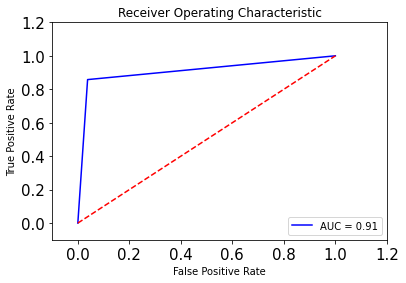

In [ ]:
# plotting ROC curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
# identifying the top features selected by the model 

var_imp = []
for i in rfc.feature_importances_:
    var_imp.append(i)
print('1st Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-3])+1)

1st Top var = 4
2nd Top var = 3
3rd Top var = 1


As identified by the model the Top feature is `Amount` followed by `Job` and `Gender`.

In [ ]:
# identifying threshold value

fpr, tpr, thresholds = metrics.roc_curve(y_sm, rfc.predict_proba(X_sm)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print('Threshold Value : ',threshold)

Threshold Value :  0.48552365183886564


## Step 6 : Cost-Benifit Analysis

### Step 6.1 : Cost-Benifit Analysis : Part 1

In [24]:
# inspecting data

test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.8600,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.9864,-81.2007,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.8400,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.4505,-109.9604,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.2800,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.4958,-74.1961,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.0500,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.8124,-80.8831,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.1900,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.9591,-85.8847,0


In [25]:
# extracting essential columns for analysis

cba = test[['trans_date_trans_time','amt','is_fraud']]

# inspecting updated dataframe

cba.head()

,trans_date_trans_time,amt,is_fraud
0,2020-06-21 12:14:25,2.8600,0
1,2020-06-21 12:14:33,29.8400,0
2,2020-06-21 12:14:53,41.2800,0
3,2020-06-21 12:15:15,60.0500,0
4,2020-06-21 12:15:17,3.1900,0


In [26]:
cba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   amt                    555719 non-null  float64
 2   is_fraud               555719 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.7+ MB


In [27]:
# converting trans_date_trans_time to appropriate format

cba.trans_date_trans_time = pd.to_datetime(cba.trans_date_trans_time)

# inspecting updated column

cba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   amt                    555719 non-null  float64       
 2   is_fraud               555719 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 12.7 MB


In [28]:
# extracting date from trans_date_trans_time
cba['date'] = cba['trans_date_trans_time'].dt.date

# dropping trans_date_trans_time
cba.drop('trans_date_trans_time',axis=1,inplace=True)

# repositioning date col
first_col = cba.pop('date')
cba.insert(0,'date',first_col)

# creating month column 
cba['month'] = pd.DatetimeIndex(cba['date']).month

# repositioning month col
second_col = cba.pop('month')
cba.insert(1,'month',second_col)

# inspecting dataframe
cba.head()

,date,month,amt,is_fraud
0,2020-06-21,6,2.8600,0
1,2020-06-21,6,29.8400,0
2,2020-06-21,6,41.2800,0
3,2020-06-21,6,60.0500,0
4,2020-06-21,6,3.1900,0


In [29]:
# calculating average number of transactions per month

avg_tran = pd.DataFrame(pd.pivot_table(cba,index=['month'],values=['is_fraud'],aggfunc='count'))

atpm = avg_tran.is_fraud.mean()

print('Average transactions per month : ',atpm)

Average transactions per month :  79388.42857142857


In [ ]:
# splitting fradulent and non-fradulent transactions

cba_f = cba[cba.is_fraud==1]
cba_nf = cba[cba.is_fraud==0]

In [ ]:
# calculating average number of fradulent transactions per month

avg_fraud = pd.DataFrame(pd.pivot_table(cba_f,index=['month'],values=['is_fraud'],aggfunc='count'))

aftpm = avg_fraud.is_fraud.mean()

print('Average fradulent transaction per month : ', aftpm)

Average fradulent transaction per month :  306.42857142857144


In [ ]:
# calculating average amount per fradulent transaction 

aapft = cba_f.amt.mean()

print('Average amount per fradulent transaction : ',aapft)

Average amount per fradulent transaction :  528.3564941724942


### Step 6.2 : Cost-Benifit Analysis : Part 2

#### Step 6.2.1 : Cost incurred per month before the model was deployed

In [ ]:
# Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month

cost_incurred_before = aapft * 2145

print('Cost incurred per month before the model was deployed : ', cost_incurred_before)

Cost incurred per month before the model was deployed :  1133324.68


#### Step 6.2.2 : Cost incurred per month after the model was deployed

In [ ]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model

cost_cust_supp = 1.5 * 1840

print('Total cost of providing customer support per month : ',cost_cust_supp)

Total cost of providing customer support per month :  2760.0


In [ ]:
# Cost incurred due to these fraudulent transactions left undetected by the model 

fraud_undetected = aapft * 305

print('Cost incurred due to fraudulent transactions left undetected by the model : ', fraud_undetected)

Cost incurred due to fraudulent transactions left undetected by the model :  161148.73072261072


In [ ]:
# Cost incurred per month after the model is built and deployed 

cost_incurred_after = cost_cust_supp + fraud_undetected

print('Cost incurred per month after the model is built and deployed : ',cost_incurred_after)

Cost incurred per month after the model is built and deployed :  163908.73072261072


#### Step 6.2.3 : Final Savings 

In [ ]:
# calculating amount saved by the bank after deploying the model

final_savings = cost_incurred_before - cost_incurred_after

print('Financial benifit to the bank after deploying the model : ',final_savings)

Financial benifit to the bank after deploying the model :  969415.9492773892
